<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [8]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n120.csv')

In [9]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [10]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

In [11]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

In [12]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [13]:
table.set_index(['rep', 'index'], inplace=True)

In [14]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

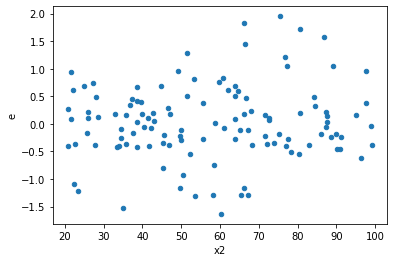

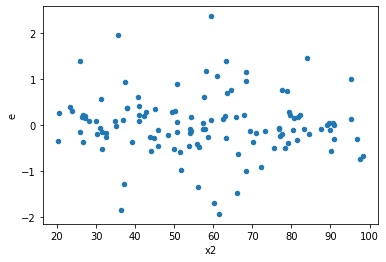

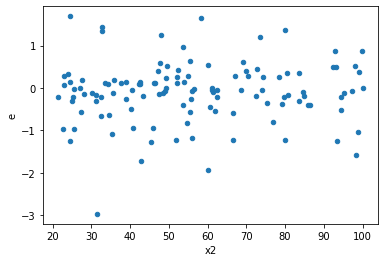

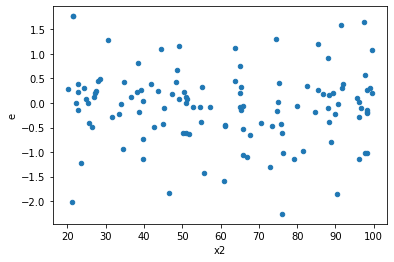

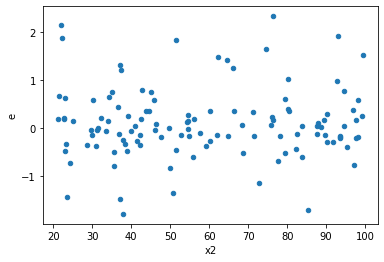

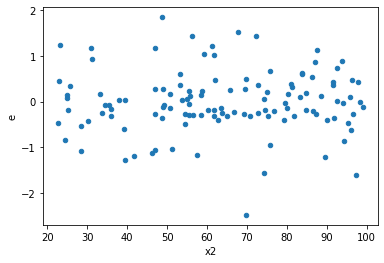

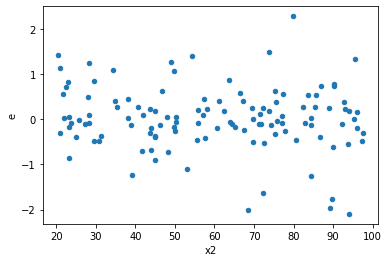

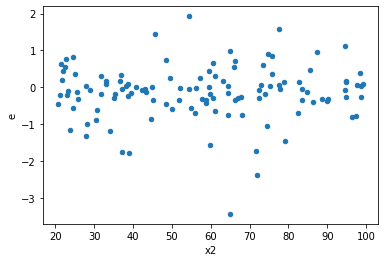

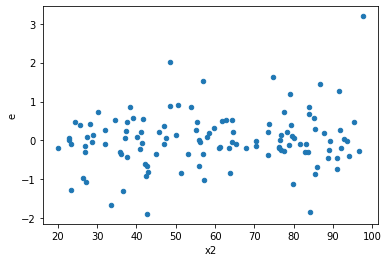

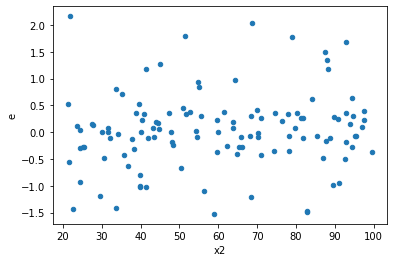

In [15]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [16]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,60.0,54.0,22.43865870432621,29.38505958405425,0.37397764507210346,0.5441677700750787,1.455081011513836,0.16320222196423684,0.9183988890178816,0.08160111098211842,Reject005=1 : Homoscedasticity
1.0,53.0,61.0,23.202835674179088,30.05888375242912,0.43778935234300165,0.4927685861053954,1.1255837618437974,0.652539156597649,0.6737304217011755,0.3262695782988245,Reject005=1 : Homoscedasticity
3.0,62.0,52.0,22.21977795213201,33.459825614788464,0.3583835153569679,0.6434581848997781,1.7954458208237107,0.03154938964266818,0.9842253051786659,0.01577469482133409,Reject005=0 : Heteroscedasticity
6.0,54.0,60.0,25.460671403665213,31.392317775814593,0.4714939148826891,0.5232052962635766,1.1096756071470268,0.692460545070773,0.6537697274646135,0.3462302725353865,Reject005=1 : Homoscedasticity
10.0,59.0,55.0,26.372160692043096,25.30453841587044,0.4469857744414084,0.4600825166521898,1.029300132039209,0.9161031432685331,0.5419484283657334,0.4580515716342666,Reject005=1 : Homoscedasticity
12.0,43.0,71.0,21.63666824988278,36.38981766177294,0.5031783313926228,0.5125326431235625,1.0185904502386862,0.9286182729560613,0.5356908635219694,0.4643091364780306,Reject005=1 : Homoscedasticity
14.0,64.0,50.0,32.038668855957845,26.79805360958447,0.5006042008743413,0.5359610721916894,1.07062839515848,0.807841211575782,0.596079394212109,0.403920605787891,Reject005=1 : Homoscedasticity
17.0,57.0,57.0,24.759218471475887,33.280000783967935,0.43437225388554185,0.5838596628766305,1.3441458510618383,0.2671834409480516,0.8664082795259742,0.1335917204740258,Reject005=1 : Homoscedasticity
18.0,61.0,53.0,26.23163749551193,29.249975233727117,0.43002684418872017,0.5518863251646626,1.2833764510814205,0.35483599412401334,0.8225820029379933,0.17741799706200667,Reject005=1 : Homoscedasticity


In [18]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,54.0,22.43865870432621,29.38505958405425,0.37397764507210346,0.5441677700750787,1.455081011513836,0.16320222196423684,Reject005=1 : Homoscedasticity
1.0,53.0,61.0,23.202835674179088,30.05888375242912,0.43778935234300165,0.4927685861053954,1.1255837618437974,0.652539156597649,Reject005=1 : Homoscedasticity
2.0,66.0,48.0,33.91944035694869,19.9873793826175,0.5139309144992226,0.4164037371378646,0.810232903664904,0.4244538446625039,Reject005=1 : Homoscedasticity
3.0,62.0,52.0,22.21977795213201,33.459825614788464,0.3583835153569679,0.6434581848997781,1.7954458208237107,0.03154938964266818,Reject005=0 : Heteroscedasticity
4.0,57.0,57.0,32.125115141229344,16.572750809223702,0.5635985112496376,0.29075001419690705,0.5158814446692597,0.01368072734517091,Reject005=0 : Heteroscedasticity
5.0,55.0,59.0,24.292524556265995,19.764473880577864,0.4416822646593817,0.33499108272165873,0.7584435906205075,0.30202712058041664,Reject005=1 : Homoscedasticity
6.0,54.0,60.0,25.460671403665213,31.392317775814593,0.4714939148826891,0.5232052962635766,1.1096756071470268,0.692460545070773,Reject005=1 : Homoscedasticity
7.0,65.0,49.0,29.339656741917786,16.498294421998718,0.45137933449104284,0.33669988616323915,0.7459355367761539,0.267507804627297,Reject005=1 : Homoscedasticity
8.0,54.0,60.0,37.097488992800805,31.72385587428089,0.6869905369037186,0.5287309312380148,0.7696334997873723,0.3298367557627857,Reject005=1 : Homoscedasticity


In [19]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      817
Reject005=0 : Heteroscedasticity    183
Name: Result_test, dtype: int64